### **Widget Classification applying ML and DL models**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

### Data loading

In [2]:
df = pd.read_csv(r'Widget_Data.csv')
df.head(5)

,grams,length_cm,country,price,flexibility,condensation,horizontal_position,vertical_position,shape,distance,target
0,552,164,China,1171.0,38.41,46.64,18.49,-24.29,cylinder,55.13,widget4
1,339,115,China,1120.0,56.49,38.19,82.76,79.27,cuboid,55.41,widget1
2,573,122,China,1138.0,59.85,45.35,8.40,-72.70,cuboid,62.69,widget4
3,451,182,Germany,1109.0,65.97,51.80,-38.20,-35.91,oblong,34.08,widget2
4,587,110,Belgium,1034.0,63.51,83.38,18.23,-52.55,cuboid,14.04,widget6


In [ ]:
print(df.isnull().sum())

### Data exploration

#### Pairplot of features

In [ ]:
df_pairplot = df.drop(['grams', 'length_cm', 'country', 'horizontal_position', 'vertical_position', 'shape'], axis = 1)
sns.pairplot(data = df_pairplot, hue = 'target')

In [ ]:
sns.pairplot(data = df, hue = 'target')

#### Pie chart of number of rows in each widget

In [ ]:
counts = df['target'].value_counts()
counts.plot(kind = 'pie', cmap = 'RdBu')
plt.xlabel('widget')
plt.ylabel('count')

plt.show()

#### Pie chart of number of missing values in each widget

In [ ]:
df_nulls = df[df.isnull().any(axis = 1)]

counts = df_nulls['target'].value_counts()
counts.plot(kind = 'pie', cmap = 'RdBu')
plt.xlabel('widget')
plt.ylabel('count')

plt.show()

### Data handling

#### Get dummy variables and data

In [3]:
df = pd.get_dummies(df, columns = ['country', 'shape'])
data = df.drop(['target'], axis = 1)

#### Fill in missing values by using regression

In [ ]:
data_withna = data[data.isnull().any(axis = 1)]
data_withna = data_withna.drop(['price'], axis = 1)
data_dropna = data.dropna(axis = 0)
price_dropna = np.array(data_dropna['price'])
data_dropna = data_dropna.drop(['price'], axis = 1)
model_r = LinearRegression()
model_r.fit(data_dropna, price_dropna)

price_pred = model_r.predict(data_withna)

missing_index = data[data.isnull().any(axis = 1)].index
data['price'][missing_index] = price_pred

#### Data splitting and regularzation

In [5]:
datapoints = data.values
target = np.array(df['target'])

In [6]:
scaler = MinMaxScaler().fit(datapoints)
datapoints = scaler.transform(datapoints)

In [7]:
datapoints_train, datapoints_test, target_train, target_test = train_test_split(datapoints, target,
                                                                                train_size = 0.7, random_state = 30)

### Model building

#### Naive Bayes

##### GussianNB

In [ ]:
time_start = datetime.now()

model_G = GaussianNB()
model_G.fit(datapoints_train, target_train)
model_cross_scores = cross_val_score(model_G, datapoints_train, target_train, cv = 5)
cv_score_mean_GNB = model_cross_scores.mean()
target_pred_GNB = model_G.predict(datapoints_test)
accuracy_GNB = accuracy_score(target_pred_GNB, target_test)

time_end = datetime.now()
time_GNB = (time_end - time_start).total_seconds()

print('Mean of cv scores:', cv_score_mean_GNB)
print('Accuracy:', accuracy_GNB)
print('Time:', time_GNB)

##### MultinomialNB

In [ ]:
time_start = datetime.now()

model_M = MultinomialNB()
model_M.fit(datapoints_train, target_train)
model_M_cross_scores = cross_val_score(model_M, datapoints_train, target_train, cv = 5)
cv_score_mean_MNB = model_M_cross_scores.mean()
target_pred_MNB = model_M.predict(datapoints_test)
accuracy_MNB = accuracy_score(target_pred_MNB, target_test)

time_end = datetime.now()
time_MNB = (time_end - time_start).total_seconds()

print('Mean of cv score:', cv_score_mean_MNB)
print('Accuracy:', accuracy_MNB)
print('Time:', time_MNB)

##### BernoulliNB

In [ ]:
time_start = datetime.now()

model_B = BernoulliNB()
model_B.fit(datapoints_train, target_train)
model_B_cross_scores = cross_val_score(model_M, datapoints_train, target_train, cv = 5)
cv_score_mean_BNB = model_B_cross_scores.mean()
target_pred_BNB = model_B.predict(datapoints_test)
accuracy_BNB = accuracy_score(target_pred_BNB, target_test)

time_end = datetime.now()
time_BNB = (time_end - time_start).total_seconds()

print('Mean of cv score:', cv_score_mean_BNB)
print('Accuracy:', accuracy_BNB)
print('Time:', time_BNB)

#### Confusion Matrix

In [140]:
def create_confusion_matrix(target, predictions):
    plt.figure()
    mat = confusion_matrix(target, predictions)
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = ['1', '2', '3', '4', '5', '6'], yticklabels = ['1', '2', '3', '4', '5', '6'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

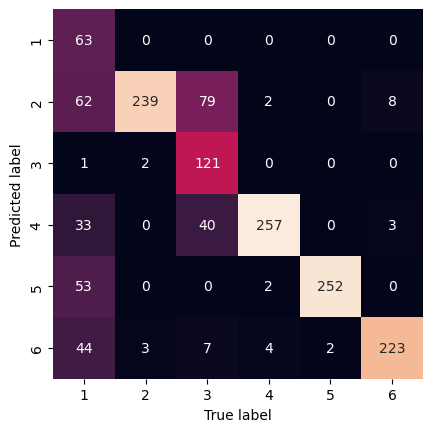

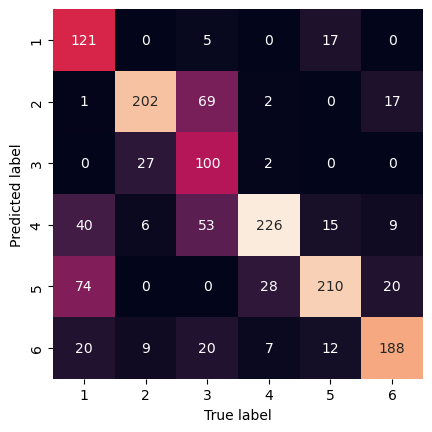

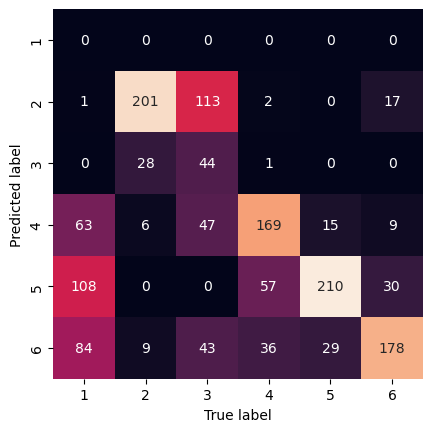

In [145]:
create_confusion_matrix(target_test, target_pred_GNB)
create_confusion_matrix(target_test, target_pred_MNB)
create_confusion_matrix(target_test, target_pred_BNB)

#### Neural Network

In [12]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, ActivityRegularization, GaussianNoise
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
from scikeras.wrappers import KerasClassifier

##### Data preparation

In [9]:
target_dic = {'widget1': 0, 'widget2': 1, 'widget3': 2, 'widget4': 3, 'widget5': 4, 'widget6': 5}
target_train_int = [target_dic[i] for i in target_train]
target_test_int = [target_dic[i] for i in target_test]
target_train_int = np.array(target_train_int)
target_test_int = np.array(target_test_int)

##### Define a function of random search

In [84]:
def random_search(activation):
    def create_model(n1, n2, init1, init2, rg1, rg2, dr, op, lr):

        model = Sequential(name = 'create_model')
        model.add(Input(shape = (24,)))
        model.add(GaussianNoise(stddev = 0.1))
        model.add(Dense(n1, activation = activation, kernel_initializer = init1, kernel_regularizer = rg1))
        model.add(ActivityRegularization())
        model.add(Dense(n2, activation = activation, kernel_initializer = init2, kernel_regularizer = rg2))
        model.add(Dropout(rate = dr))
        model.add(Dense(6, activation = 'softmax'))

        model.compile(optimizer = op(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        
        return model

    param_dict = {
        'n1': [int(x) for x in np.linspace(24, 48, 12)],
        'n2': [int(x) for x in np.linspace(24, 48, 12)],
        'init1': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_uniform'],
        'init2': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_uniform'],
        'rg1': ['l1', 'l2'],
        'rg2': ['l1', 'l2'],
        'dr': [0.2, 0.3, 0.4, 0.5],
        'op': [SGD, Adam, Adadelta, Adagrad, RMSprop],
        'lr': [0.001, 0.003, 0.01, 0.03],
    }

    es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

    model_rds = KerasClassifier(build_fn = create_model, n1 = 24, n2 = 24, init1 = 'glorot_uniform', init2 = 'glorot_uniform', rg1 = l1, rg2 = l1, dr = 0.2, op = SGD, lr = 0.001, epochs = 30, validation_split = 0.3, callbacks = [es], random_state = 30)
    rds = RandomizedSearchCV(estimator = model_rds, param_distributions = param_dict, n_iter = 30, random_state = 30)
    rds_result = rds.fit(datapoints_train, target_train_int)
    
    return rds_result

##### Define a function of creating the model with best parameters

In [131]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

def build_best_model(activation, rds_result):
    time_start = datetime.now()

    model = Sequential(name = 'create_model')
    model.add(Input(shape = (24,)))
    model.add(GaussianNoise(stddev = 0.1))
    model.add(Dense(rds_result.best_params_['n1'], activation = activation, kernel_initializer = rds_result.best_params_['init1'], kernel_regularizer = rds_result.best_params_['rg1']))
    model.add(ActivityRegularization())
    model.add(Dense(rds_result.best_params_['n2'], activation = activation, kernel_initializer = rds_result.best_params_['init2'], kernel_regularizer = rds_result.best_params_['rg2']))
    model.add(Dropout(rate = rds_result.best_params_['dr']))
    model.add(Dense(6, activation = 'softmax'))
    model.compile(optimizer = rds_result.best_params_['op'](learning_rate = rds_result.best_params_['lr']), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

    model_history = model.fit(datapoints_train, target_train_int, validation_data = (datapoints_test, target_test_int), epochs = 30, callbacks = [es])
    test_loss, test_accuracy =  model.evaluate(datapoints_test, target_test_int)
    train_loss, train_accuracy =  model.evaluate(datapoints_train, target_train_int)
    predictions = model_history.model.predict(datapoints_test)
    predictions = np.argmax(predictions, axis = 1)

    time_end = datetime.now()
    time = time_end - time_start
    print(predictions)
    return test_loss, train_loss, test_accuracy, train_accuracy, time, model_history, predictions

##### Relu model

Random Search for best paramenters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

rds_result_relu = random_search('relu')

best_estimator_relu = rds_result_relu.best_estimator_
best_score_relu = rds_result_relu.best_score_ 
best_params_relu = rds_result_relu.best_params_

print('Best estimator:', best_estimator_relu)
print('Best score:', best_score_relu)
print('Best parameters:', best_params_relu)

Create the model with best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

best_result_relu = build_best_model('relu', rds_result_relu)

test_loss_relu = best_result_relu[0]
train_loss_relu = best_result_relu[1]
test_accuracy_relu = best_result_relu[2]
train_accuracy_relu = best_result_relu[3]
time_relu = best_result_relu[4].total_seconds()
model_history_relu = best_result_relu[5]

predictions_relu = []
for i in (best_result_relu[6]):
    predictions_relu.append(i)

print('Test loss of relu model:', test_loss_relu)
print('Train loss of relu model:', train_loss_relu)
print('Test accuracy of relu model:', test_accuracy_relu)
print('Train accuracy of relu model:', train_accuracy_relu)
print('Time of relu model:', time_relu)

##### Linear model

Random search for best parameter

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

rds_result_linear = random_search('linear')

best_estimator_linear = rds_result_linear.best_estimator_
best_score_linear = rds_result_linear.best_score_ 
best_params_linear = rds_result_linear.best_params_

print('Best estimator:', best_estimator_linear)
print('Best score:', best_score_linear)
print('Best parameters:', best_params_linear)

Create model with best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

best_result_linear = build_best_model('linear', rds_result_linear)

test_loss_linear = best_result_linear[0]
train_loss_linear = best_result_linear[1]
test_accuracy_linear = best_result_linear[2]
train_accuracy_linear = best_result_linear[3]
time_linear = best_result_linear[4].total_seconds()
model_history_linear = best_result_linear[5]

predictions_linear = []
for i in (best_result_linear[6]):
    predictions_linear.append(i)

print('Test loss of linear model:', test_loss_linear)
print('Train loss of linear model:', train_loss_linear)
print('Test accuracy of linear model:', test_accuracy_linear)
print('Train accuracy of linear model:', train_accuracy_linear)
print('Time of linear model:', time_linear)

##### Sigmoid model

Random search for best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

rds_result_sigmoid = random_search('sigmoid')

best_estimator_sigmoid = rds_result_sigmoid.best_estimator_
best_score_sigmoid = rds_result_sigmoid.best_score_ 
best_params_sigmoid = rds_result_sigmoid.best_params_

print('Best estimator:', best_estimator_sigmoid)
print('Best score:', best_score_sigmoid)
print('Best parameters:', best_params_sigmoid)

Create model with best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

best_result_sigmoid = build_best_model('sigmoid', rds_result_sigmoid)

test_loss_sigmoid = best_result_sigmoid[0]
train_loss_sigmoid = best_result_sigmoid[1]
test_accuracy_sigmoid = best_result_sigmoid[2]
train_accuracy_sigmoid = best_result_sigmoid[3]
time_sigmoid = best_result_sigmoid[4].total_seconds()
model_history_sigmoid = best_result_sigmoid[5]

predictions_sigmoid = []
for i in (best_result_sigmoid[6]):
    predictions_sigmoid.append(i)

print('Test loss of sigmoid model:', test_loss_sigmoid)
print('Train loss of sigmoid model:', train_loss_sigmoid)
print('Test accuracy of sigmoid model:', test_accuracy_sigmoid)
print('Train accuracy of sigmoid model:', train_accuracy_sigmoid)
print('Time of sigmoid model:', time_sigmoid)

##### Tanh model

Random search for best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

rds_result_tanh = random_search('tanh')

best_estimator_tanh = rds_result_tanh.best_estimator_
best_score_tanh = rds_result_tanh.best_score_ 
best_params_tanh = rds_result_tanh.best_params_

print('Best estimator:', best_estimator_tanh)
print('Best score:', best_score_tanh)
print('Best parameters:', best_params_tanh)

Create model with best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

best_result_tanh = build_best_model('tanh', rds_result_tanh)

test_loss_tanh = best_result_tanh[0]
train_loss_tanh = best_result_tanh[1]
test_accuracy_tanh = best_result_tanh[2]
train_accuracy_tanh = best_result_tanh[3]
time_tanh = best_result_tanh[4].total_seconds()
model_history_tanh = best_result_tanh[5]

predictions_tanh = []
for i in (best_result_tanh[6]):
    predictions_tanh.append(i)

print('Test loss of tanh model:', test_loss_tanh)
print('Train loss of tanh model:', train_loss_tanh)
print('Test accuracy of tanh model:', test_accuracy_tanh)
print('Train accuracy of tanh model:', train_accuracy_tanh)
print('Time of tanh model:', time_tanh)

##### Softplus model

Random search for best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

rds_result_softplus = random_search('softplus')

best_estimator_softplus = rds_result_softplus.best_estimator_
best_score_softplus = rds_result_softplus.best_score_ 
best_params_softplus = rds_result_softplus.best_params_

print('Best estimator:', best_estimator_softplus)
print('Best score:', best_score_softplus)
print('Best parameters:', best_params_softplus)

Create model with best parameters

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)
rn.seed(30)

best_result_softplus = build_best_model('softplus', rds_result_softplus)

test_loss_softplus = best_result_softplus[0]
train_loss_softplus = best_result_softplus[1]
test_accuracy_softplus = best_result_softplus[2]
train_accuracy_softplus = best_result_softplus[3]
time_softplus = best_result_softplus[4].total_seconds()
model_history_softplus = best_result_softplus[5]

predictions_softplus = []
for i in (best_result_softplus[6]):
    predictions_softplus.append(i)

print('Test loss of softplus model:', test_loss_softplus)
print('Train loss of softplus model:', train_loss_softplus)
print('Test accuracy of softplus model:', test_accuracy_softplus)
print('Train accuracy of softplus model:', train_accuracy_softplus)
print('Time of softplus model:', time_softplus)

##### Comparison of training process

Loss of training neural network model

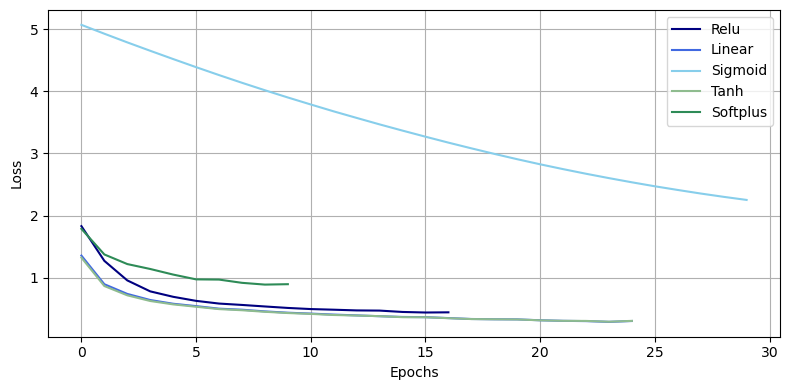

In [160]:
f = plt.figure(figsize = (8, 4))
ax = plt.axes()
grid = plt.grid()
plt.subplot(1, 1, 1)
plt.plot(model_history_relu.history['val_loss'], linestyle = '-', color = 'navy', label = 'Relu')
plt.plot(model_history_linear.history['val_loss'], linestyle = '-', color = 'royalblue', label = 'Linear')
plt.plot(model_history_sigmoid.history['val_loss'], linestyle = '-', color = 'skyblue', label = 'Sigmoid')
plt.plot(model_history_tanh.history['val_loss'], linestyle = '-', color = 'darkseagreen', label = 'Tanh')
plt.plot(model_history_softplus.history['val_loss'], linestyle = '-', color = 'seagreen', label = 'Softplus')
plt.xlabel('Epochs')
plt.ylabel('Val_loss')
plt.legend()
plt.tight_layout()
plt.show()

Accuracy of training neural network model

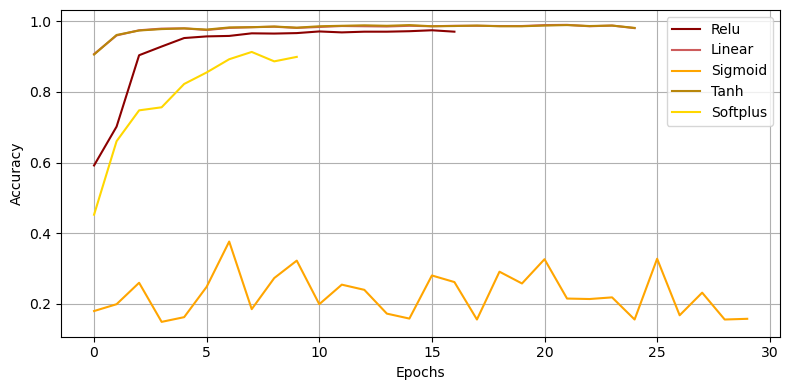

In [161]:
f = plt.figure(figsize = (8, 4))
ax = plt.axes()
grid = plt.grid()
plt.subplot(1, 1, 1)
plt.plot(model_history_relu.history['val_accuracy'], linestyle = '-', color = 'darkred', label = 'Relu')
plt.plot(model_history_linear.history['val_accuracy'], linestyle = '-', color = 'indianred', label = 'Linear')
plt.plot(model_history_sigmoid.history['val_accuracy'], linestyle = '-', color = 'orange', label = 'Sigmoid')
plt.plot(model_history_tanh.history['val_accuracy'], linestyle = '-', color = 'darkgoldenrod', label = 'Tanh')
plt.plot(model_history_softplus.history['val_accuracy'], linestyle = '-', color = 'gold', label = 'Softplus')
plt.xlabel('Epochs')
plt.ylabel('Val_accuracy')
plt.legend()
plt.tight_layout()
plt.show()

##### Comparison of accuracy and time in training

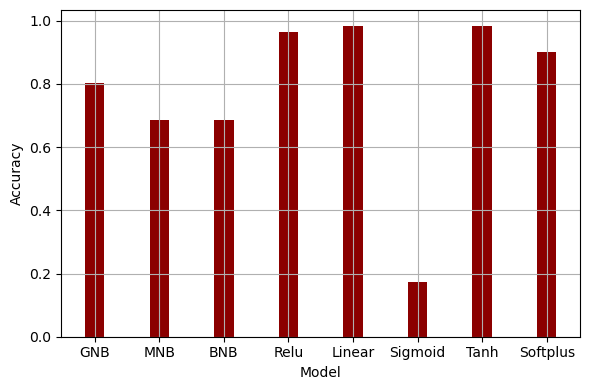

In [166]:
f = plt.figure(figsize = (6, 4))
ax = plt.axes()
grid = plt.grid()
name_list = ['GNB', 'MNB', 'BNB', 'Relu', 'Linear', 'Sigmoid', 'Tanh', 'Softplus']
accuracy_training_list = [cv_score_mean_GNB, cv_score_mean_MNB, cv_score_mean_BNB, train_accuracy_relu, train_accuracy_linear, train_accuracy_sigmoid, train_accuracy_tanh, train_accuracy_softplus]
plt.bar(x = name_list, height = accuracy_training_list, color = 'darkred', width = 0.3)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

Time

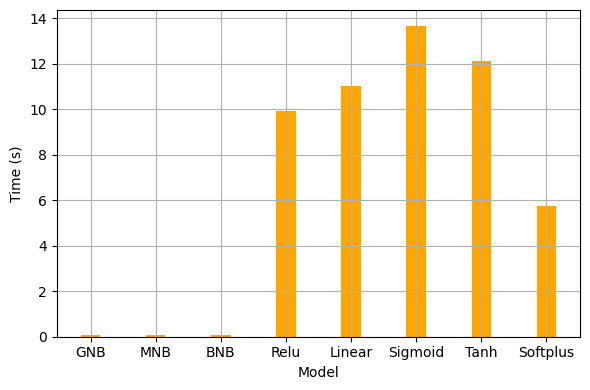

In [169]:
f = plt.figure(figsize = (6, 4))
ax = plt.axes()
grid = plt.grid()
name_list = ['GNB', 'MNB', 'BNB', 'Relu', 'Linear', 'Sigmoid', 'Tanh', 'Softplus']
accuracy_testing_list = [time_GNB, time_MNB, time_BNB, time_relu, time_linear, time_sigmoid, time_tanh, time_softplus]
plt.bar(x = name_list, height = accuracy_testing_list, color = 'orange', width = 0.3)
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.show()

##### Comparison of accuracy in testing

Accuracy

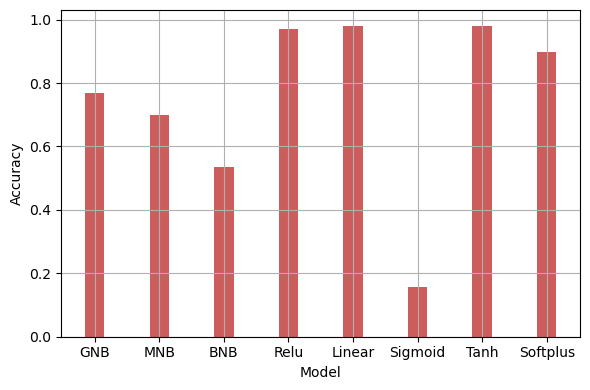

In [168]:
f = plt.figure(figsize = (6, 4))
ax = plt.axes()
grid = plt.grid()
name_list = ['GNB', 'MNB', 'BNB', 'Relu', 'Linear', 'Sigmoid', 'Tanh', 'Softplus']
accuracy_testing_list = [accuracy_GNB, accuracy_MNB, accuracy_BNB, test_accuracy_relu, test_accuracy_linear, test_accuracy_sigmoid, test_accuracy_tanh, test_accuracy_softplus]
plt.bar(x = name_list, height = accuracy_testing_list, color = 'indianred', width = 0.3)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

Confusion Matrix

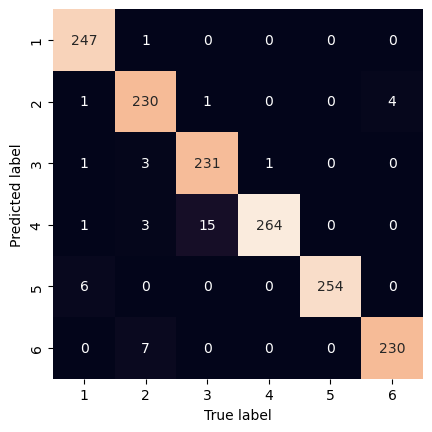

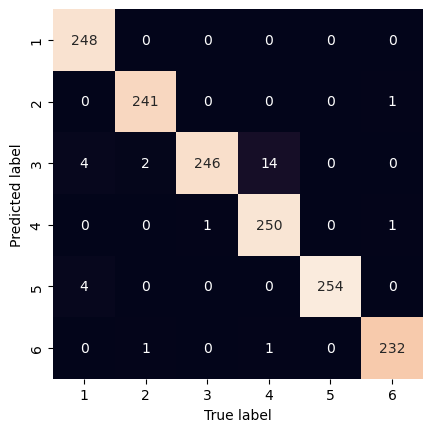

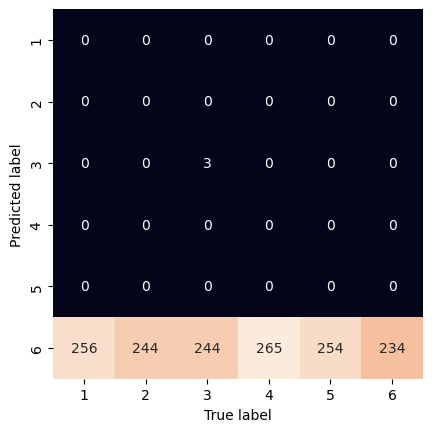

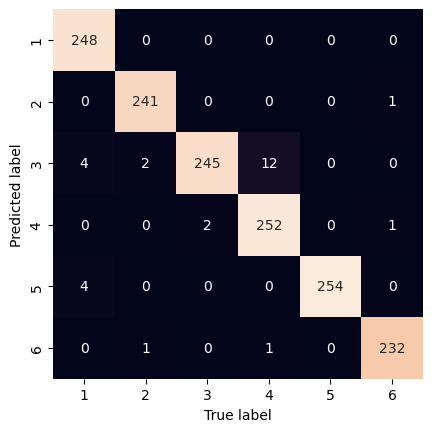

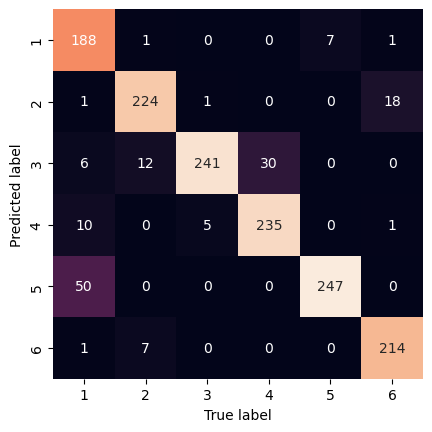

In [159]:
create_confusion_matrix(target_test_int, predictions_relu)
create_confusion_matrix(target_test_int, predictions_linear)
create_confusion_matrix(target_test_int, predictions_sigmoid)
create_confusion_matrix(target_test_int, predictions_tanh)
create_confusion_matrix(target_test_int, predictions_softplus)